 - Обучить сверточную нейронную сеть на датасете cifar10
 - Оценить рост точности при увеличении ширины сети (больше ядер)
 - Оценить рост точности при увеличении ширины сети (больше слоев)
 - Сравнить с точностью полносвязной сети для этой выборки

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

data = cifar10.load_data()

170498071/170498071 [==============================] - 4063s 24us/step


In [28]:
(X_train, y_train), (X_test, y_test) = data
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

50000 тренировочные примеры
10000 тестовые примеры


In [29]:
num_classes = 10

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [25]:
batch_size = 100
epochs = 10

### Базовая модель

In [65]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 2, 2, 32)       

In [66]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 67s 131ms/step - loss: 1.7447 - accuracy: 0.3570 - val_loss: 1.5263 - val_accuracy: 0.4365
Epoch 2/10
500/500 [==============================] - 66s 132ms/step - loss: 1.4134 - accuracy: 0.4876 - val_loss: 1.3430 - val_accuracy: 0.5120
Epoch 3/10
500/500 [==============================] - 64s 129ms/step - loss: 1.2718 - accuracy: 0.5464 - val_loss: 1.2013 - val_accuracy: 0.5664
Epoch 4/10
500/500 [==============================] - 64s 129ms/step - loss: 1.1783 - accuracy: 0.5830 - val_loss: 1.1461 - val_accuracy: 0.5936
Epoch 5/10
500/500 [==============================] - 66s 131ms/step - loss: 1.1156 - accuracy: 0.6065 - val_loss: 1.1311 - val_accuracy: 0.5982
Epoch 6/10
500/500 [==============================] - 64s 129ms/step - loss: 1.0554 - accuracy: 0.6280 - val_loss: 1.0797 - val_accuracy: 0.6232
Epoch 7/10
500/500 [==============================] - 64s 129ms/step - loss: 1.0084 - accuracy: 0.6460 - val_loss: 1.0391 - val_ac

### Больше ядер

In [35]:
model_2 = Sequential()

model_2.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(128, (3, 3), activation='relu'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          73792     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 2, 2, 64)        

In [37]:
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 157s 311ms/step - loss: 1.6879 - accuracy: 0.3840 - val_loss: 1.4020 - val_accuracy: 0.4947
Epoch 2/10
500/500 [==============================] - 156s 312ms/step - loss: 1.3084 - accuracy: 0.5324 - val_loss: 1.1817 - val_accuracy: 0.5812
Epoch 3/10
500/500 [==============================] - 157s 314ms/step - loss: 1.1420 - accuracy: 0.5975 - val_loss: 1.1016 - val_accuracy: 0.6141
Epoch 4/10
500/500 [==============================] - 156s 313ms/step - loss: 1.0416 - accuracy: 0.6346 - val_loss: 1.0617 - val_accuracy: 0.6258
Epoch 5/10
500/500 [==============================] - 156s 311ms/step - loss: 0.9708 - accuracy: 0.6618 - val_loss: 1.0553 - val_accuracy: 0.6386
Epoch 6/10
500/500 [==============================] - 156s 311ms/step - loss: 0.9116 - accuracy: 0.6812 - val_loss: 0.9626 - val_accuracy: 0.6651
Epoch 7/10
500/500 [==============================] - 157s 314ms/step - loss: 0.8664 - accuracy: 0.6994 - val_loss: 0.9078 -

### Больше слоев

In [47]:
model_3 = Sequential()

model_3.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(32, (2, 2), activation='relu'))
model_3.add(MaxPooling2D((1, 1)))

model_3.add(Flatten())
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_62 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 2, 2, 64)       

In [48]:
model_3.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history_3 = model_3.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 63s 123ms/step - loss: 1.7656 - accuracy: 0.3435 - val_loss: 1.4783 - val_accuracy: 0.4491
Epoch 2/10
500/500 [==============================] - 61s 122ms/step - loss: 1.3858 - accuracy: 0.4961 - val_loss: 1.3324 - val_accuracy: 0.5221
Epoch 3/10
500/500 [==============================] - 62s 123ms/step - loss: 1.2504 - accuracy: 0.5500 - val_loss: 1.2104 - val_accuracy: 0.5643
Epoch 4/10
500/500 [==============================] - 61s 122ms/step - loss: 1.1465 - accuracy: 0.5908 - val_loss: 1.1262 - val_accuracy: 0.6067
Epoch 5/10
500/500 [==============================] - 61s 123ms/step - loss: 1.0686 - accuracy: 0.6207 - val_loss: 1.0898 - val_accuracy: 0.6139
Epoch 6/10
500/500 [==============================] - 61s 122ms/step - loss: 1.0082 - accuracy: 0.6434 - val_loss: 1.0213 - val_accuracy: 0.6502
Epoch 7/10
500/500 [==============================] - 62s 124ms/step - loss: 0.9551 - accuracy: 0.6625 - val_loss: 0.9820 - val_ac

In [49]:
model_4 = Sequential()

model_4.add(Flatten(input_shape=(32, 32, 3)))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(32, activation='relu'))

model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(num_classes, activation='softmax'))

model_4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 3072)              0         
                                                                 
 dense_24 (Dense)            (None, 64)                196672    
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 10)                330       
                                                                 
Total params: 204,298
Trainable params: 204,298
Non-t

In [50]:
model_4.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

history_4 = model_4.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 5s 7ms/step - loss: 1.9125 - accuracy: 0.2998 - val_loss: 1.8180 - val_accuracy: 0.3447
Epoch 2/10
500/500 [==============================] - 3s 7ms/step - loss: 1.7501 - accuracy: 0.3661 - val_loss: 1.7092 - val_accuracy: 0.3796
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 1.6755 - accuracy: 0.3966 - val_loss: 1.6665 - val_accuracy: 0.4049
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 1.6269 - accuracy: 0.4169 - val_loss: 1.6032 - val_accuracy: 0.4344
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 1.5845 - accuracy: 0.4306 - val_loss: 1.5544 - val_accuracy: 0.4475
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 1.5591 - accuracy: 0.4406 - val_loss: 1.5571 - val_accuracy: 0.4433
Epoch 7/10
500/500 [==============================] - 3s 7ms/step - loss: 1.5306 - accuracy: 0.4536 - val_loss: 1.5249 - val_accuracy: 0.4549
Epoch 

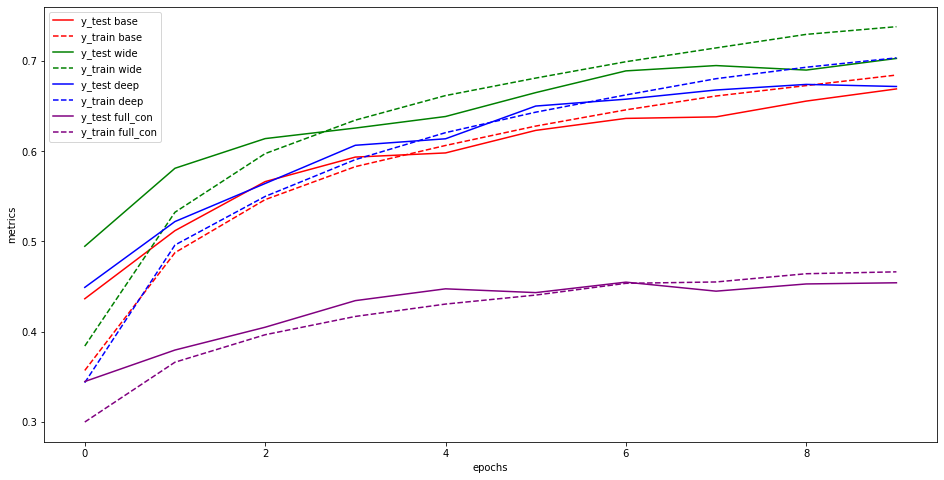

In [76]:
plt.figure(figsize=(16, 8))

plt.plot(model.history.history['val_accuracy'], color='r', label='y_test base')
plt.plot(model.history.history['accuracy'], color='r', linestyle='dashed', label='y_train base')
plt.plot(model_2.history.history['val_accuracy'], color='g', label='y_test wide')
plt.plot(model_2.history.history['accuracy'], color='g', linestyle='dashed', label='y_train wide')
plt.plot(model_3.history.history['val_accuracy'], color='b', label='y_test deep')
plt.plot(model_3.history.history['accuracy'], color='b', linestyle='dashed', label='y_train deep')
plt.plot(model_4.history.history['val_accuracy'], color='purple', label='y_test full_con')
plt.plot(model_4.history.history['accuracy'], color='purple', linestyle='dashed', label='y_train full_con')


plt.xlabel('epochs')
plt.ylabel('metrics')
plt.legend()
plt.show()

##### Полносвязная сеть - аутсайдер. Широкая лучше других. Глубокая от исходной немного отличается, но это отличие можно воспринимать, только если обучение закончить на предпоследней итерации, там результат на тесте выше, а на поледней метрики на тесте схожи